In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd 
import json

In [4]:
import pprint

In [245]:
import seaborn as sns
sns.set(rc = {'figure.figsize' : (9,6)})

# 31.01 
### Задача: 
Выбрасываем часть категорий, которые не связаны с продуктами(json)
### Описание:
Частота встречаемости продуктов в сессии; EDA продуктов и взаимодействия продуктов и сессии из json

In [2]:
with open ('sessions_420.json') as f:
    session_420 = json.load(f)

In [268]:
#pprint.pprint(session_420[:10], indent=2)

In [39]:
session_420[:2]

[{'query': 'гель алое',
  'search_results': ['99730300002', None, '99720100024', '99730300080'],
  'views': [],
  'purchases': []},
 {'query': 'бьюти бокс flacon',
  'search_results': [None,
   None,
   None,
   None,
   '19760303130',
   None,
   '19760304573',
   '18480300014',
   None,
   '19760305063',
   '19760305487',
   None],
  'views': [],
  'purchases': []}]

In [17]:
df = pd.read_json('sessions_420.json', orient='records')

In [19]:
df.head(10)

,query,search_results,views,purchases
0,гель алое,"[99730300002, None, 99720100024, 99730300080]",[],[]
1,бьюти бокс flacon,"[None, None, None, None, 19760303130, None, 19...",[],[]
2,колготки,"[22082900011, 22082900010, 22082900009, 220829...",[],[]
3,помада гигиеническая,"[3885700001, 89230500006, 89230600011, 8941650...",[],[]
4,ножницы,"[70130100027, 8410400003, 8380100002, 70130100...",[],[]
5,кабуки,"[None, None, None, 14085100015, 24461400028, 6...",[],[]
6,японская мочалка для тела,"[None, None, 28222900004, None, None, None, No...",[],[]
7,косметички flacon,"[19760303130, None, None, None, None, 19760305...",[],[]
8,туалетная вода dior,"[7132700003, 7191500004, 7193800001, 197603028...",[],[]
9,салфетки матирующие,"[6670300001, 15110800054, 97610600002, 6997110...",[],[]


In [33]:
df.shape

(2416570, 4)

In [36]:
# определение максимальной длины списка в колонке views
max_len = 0
count = 0
for j in range(0, df.shape[0]):
    if len(df.views[j]) > max_len:
        max_len = len(df.views[j])
        count += 1
print(max_len, count)

16 8


In [38]:
# определение максимальной длины списка в колонке purchases
max_len_purchases = 0
count_purchases = 0
for j in range(0, df.shape[0]):
    if len(df.purchases[j]) > max_len_purchases:
        max_len_purchases = len(df.purchases[j])
        count_purchases += 1
print(max_len_purchases, count_purchases)

45 10


**Вывод**: фичи views и purchases неинформативны, поскольку практически все из них - это пустые списки

In [65]:
df.search_results.head()

0              [99730300002, 99720100024, 99730300080]
1    [19760303130, 19760304573, 18480300014, 197603...
2    [22082900011, 22082900010, 22082900009, 220829...
3    [3885700001, 89230500006, 89230600011, 8941650...
4    [70130100027, 8410400003, 8380100002, 70130100...
Name: search_results, dtype: object

In [102]:
# посмотрела, как работает explode
piece_2 = df[['query', 'search_results']][:10]
piece_2 = piece_2.explode('search_results', ignore_index=False)
piece_2

,query,search_results
0,гель алое,99730300002
0,гель алое,99720100024
0,гель алое,99730300080
1,бьюти бокс flacon,19760303130
1,бьюти бокс flacon,19760304573
...,...,...
9,салфетки матирующие,3570600009
9,салфетки матирующие,3272100001
9,салфетки матирующие,6580100009
9,салфетки матирующие,36980600003


In [119]:
df_1 = df[['query', 'search_results']].explode('search_results', ignore_index=False)

In [120]:
df_1.head(10)

,query,search_results
0,гель алое,99730300002
0,гель алое,99720100024
0,гель алое,99730300080
1,бьюти бокс flacon,19760303130
1,бьюти бокс flacon,19760304573
1,бьюти бокс flacon,18480300014
1,бьюти бокс flacon,19760305063
1,бьюти бокс flacon,19760305487
2,колготки,22082900011
2,колготки,22082900010


In [105]:
print(len(df_1), len(df_1.drop_duplicates()))

79546345 8349747


In [121]:
df_1.isna().sum()

query                   0
search_results    9787219
dtype: int64

In [124]:
df_1 = df_1.dropna(inplace=False)

In [125]:
df_1.shape

(69759126, 2)

In [128]:
print('Число дубликатов равно:', 69759126-8349747)

Число дубликатов равно: 61409379


In [129]:
df_1 = df_1.drop_duplicates()

In [130]:
df_1.shape

(8172186, 2)

In [131]:
df_1.head()

,query,search_results
0,гель алое,99730300002
0,гель алое,99720100024
0,гель алое,99730300080
1,бьюти бокс flacon,19760303130
1,бьюти бокс flacon,19760304573


In [132]:
df_1.search_results.nunique()

47064

*Предположение:* 
порядок величины уникальных значений в search_results совпадает с порядком числа различных продуктов (57925), поэтому можно предположить, что **в search_results указаны product_id**

На самом деле: в search_results указан **external_id**

**Лирическое отступление** на работу с табличками с продуктами. Отсюда нужно будет вытащить категории продуктов.

In [150]:
products = pd.read_csv('~/comptech/products.csv', index_col=0)

In [287]:
products_categories = pd.read_csv('~/comptech/products_categories.csv', index_col=0)

In [152]:
products.head()

,id,site_id,external_id,name,brand,description,last_existed,group_id
0,2573904266,420,24944900083,Губная помада | URBAN DECAY | VICE LIPSTICK M...,URBAN DECAY,Губная помада Urban Decay Vice Lipstick незаме...,2021-01-28,111948
1,2573904322,420,24944900078,Губная помада | URBAN DECAY | VICE LIPSTICK M...,URBAN DECAY,Губная помада Urban Decay Vice Lipstick - это ...,2021-01-28,111946
2,2573904375,420,7005200014,Губная помада | BOURJOIS | Rouge Edition Velvet,BOURJOIS,Бархатный флюид для губ Bourjois Rouge edition...,2021-01-28,113391
3,2573904490,420,24944900057,Губная помада | URBAN DECAY | VICE LIPSTICK C...,URBAN DECAY,Губная помада Urban Decay Vice Lipstick рассчи...,2021-01-28,123428
4,2573905005,420,17059600013,Блеск для губ | GA DE | VELVETEEN ULTRA SHINE,GA DE,Оригинальная формула объединяет комплекс пигме...,2021-01-28,93766


In [283]:
products_categories.head()

,product_id,category_id
0,2573916522,873202
1,2574226585,873224
2,2585316813,873244
3,2573916527,873202
4,2612144294,3115485


In [164]:
print(products.id.isna().sum(), products_categories.product_id.isna().sum(), sep=', ')

0, 0


In [165]:
print(products.id.nunique(), products_categories.product_id.nunique(), sep=', ')

60291, 57925


Для начала все-таки проведем **количественный анализ**. 

In [198]:
df_1.head()

,query,search_results
0,гель алое,99730300002
0,гель алое,99720100024
0,гель алое,99730300080
1,бьюти бокс flacon,19760303130
1,бьюти бокс flacon,19760304573


In [351]:
count_of_query = df_1.groupby('search_results').count().reset_index() \
    .rename(columns={'search_results': 'external_id', 'query': 'count_of_query'})

In [352]:
count_of_query.head()

,external_id,count_of_query
0,142541,252
1,187501,99
2,835606,16
3,141400001,79
4,1010100030,10


In [203]:
print(count_of_query.count_of_query.max(), count_of_query.count_of_query.min())

1772 1


In [353]:
count_of_query.nunique()

external_id       47064
count_of_query      805
dtype: int64

<AxesSubplot:>

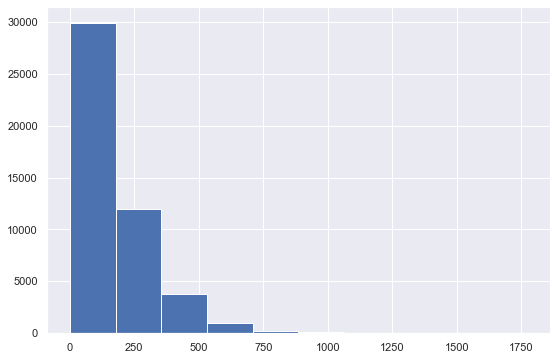

In [247]:
count_of_query.count_of_query.hist()

In [212]:
count_of_query.count_of_query.describe()

count    47064.000000
mean       173.639852
std        149.698033
min          1.000000
25%         70.000000
50%        132.000000
75%        232.000000
max       1772.000000
Name: count_of_query, dtype: float64

In [220]:
print('0.85 quantile = {}; 0.90 quantile = {}; 0.95 quantile = {}'.format(count_of_query.count_of_query.quantile(q=0.85), \
                                                                         count_of_query.count_of_query.quantile(q=0.90), \
                                                                         count_of_query.count_of_query.quantile(q=0.95)))

0.85 quantile = 302.0; 0.90 quantile = 372.0; 0.95 quantile = 469.0


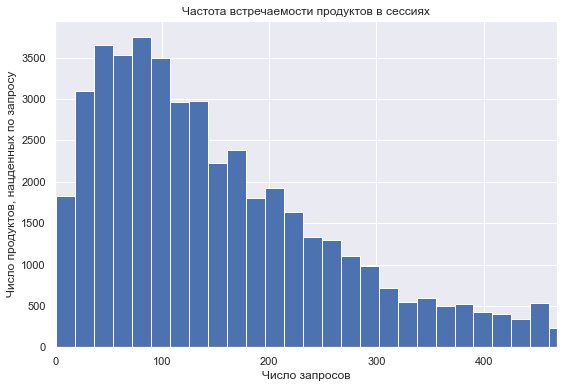

In [281]:
plt.hist(count_of_query.count_of_query, bins=100)

plt.title('Частота встречаемости продуктов в сессиях')
plt.xlabel('Число запросов')
plt.ylabel('Число продуктов, нацденных по запросу')

plt.xlim(0, count_of_query.count_of_query.quantile(q=0.95))

plt.grid(True)

plt.show()

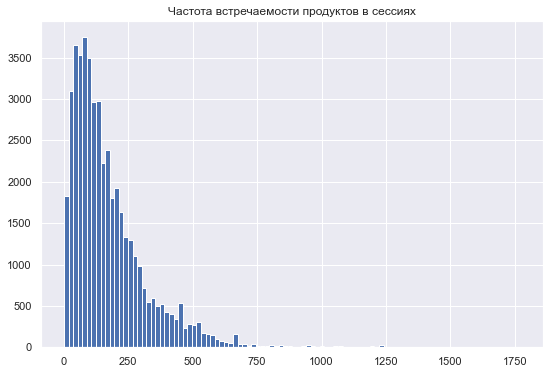

In [254]:
plt.hist(count_of_query.count_of_query, bins=100)

plt.title('Частота встречаемости продуктов в сессиях')

plt.grid(True)
plt.show()

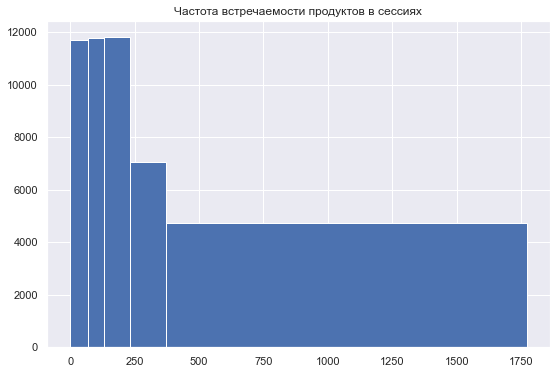

In [294]:
plt.hist(count_of_query.count_of_query, bins=[0, count_of_query.count_of_query.quantile(q=0.25), \
                                              count_of_query.count_of_query.quantile(q=0.5), \
                                              count_of_query.count_of_query.quantile(q=0.75), \
                                             count_of_query.count_of_query.quantile(q=0.90), \
                                             count_of_query.count_of_query.quantile(q=1)])

plt.title('Частота встречаемости продуктов в сессиях')

plt.grid(True)
plt.show()

In [288]:
products_categories = products_categories.drop(columns=['site_id'])

In [289]:
products_categories.head()

,product_id,category_id
0,2573916522,873202
1,2574226585,873224
2,2585316813,873244
3,2573916527,873202
4,2612144294,3115485


In [280]:
products_categories.groupby('product_id')['category_id'].apply(list)

product_id
2573904128              [873881, 873485]
2573904130             [873244, 3672618]
2573904131    [873244, 3672618, 3658303]
2573904132    [873248, 3672618, 3658303]
2573904133    [873244, 3672618, 3658303]
                         ...            
2631072922                      [873966]
2631072923             [3115486, 873909]
2631072924              [873482, 873874]
2631072925                      [873895]
2631186608                      [873219]
Name: category_id, Length: 57925, dtype: object

# 01.02 
### Задача: 
EDA: количество разных категорий среди просмотренных товаров в сессии
### Описание:
Т.е. "сколько категорий в сессии" + гистограмма(json)

In [295]:
with open ('420_searches.json') as f:
    searches_420 = json.load(f)

In [296]:
searches_420[:2]

[{'query': '0 70',
  'amount': 1,
  'products': {'89072600018': '1',
   '89072600022': '1',
   '89072600015': '1',
   '89072600014': '1',
   '89072600024': '1',
   '89072600013': '1',
   '89072600021': '1',
   '89072600020': '1',
   '89072600012': '1',
   '89072600023': '1',
   '89072600019': '1'}},
 {'query': '2 molecules', 'amount': 1, 'products': {'26500100001': '1'}}]

In [303]:
df.head()

,query,search_results,views,purchases
0,гель алое,"[99730300002, 99720100024, 99730300080]",[],[]
1,бьюти бокс flacon,"[19760303130, 19760304573, 18480300014, 197603...",[],[]
2,колготки,"[22082900011, 22082900010, 22082900009, 220829...",[],[]
3,помада гигиеническая,"[3885700001, 89230500006, 89230600011, 8941650...",[],[]
4,ножницы,"[70130100027, 8410400003, 8380100002, 70130100...",[],[]


In [313]:
print(df['query'].nunique(), df.shape[0])

235566 2416570


In [315]:
235566/2416570*100

9.7479485386312

В 2416570 сессий 235566 уникальных запросов (9,75%)

In [316]:
df_1.head()

,query,search_results
0,гель алое,99730300002
0,гель алое,99720100024
0,гель алое,99730300080
1,бьюти бокс flacon,19760303130
1,бьюти бокс flacon,19760304573


In [318]:
df_1.loc[0, :]

,query,search_results
0,гель алое,99730300002
0,гель алое,99720100024
0,гель алое,99730300080


In [326]:
df_1[df_1['query']=='гель алое']

,query,search_results
0,гель алое,99730300002
0,гель алое,99720100024
0,гель алое,99730300080
3985,гель алое,30013100013
3985,гель алое,1260100030
...,...,...
967705,гель алое,30013600001
967705,гель алое,39540200004
1295680,гель алое,9410800001
1295680,гель алое,9411100002


In [329]:
df_1[df_1['query']=='гель алое'].index.nunique() # число различных сессий с заданным запросом 'гель алое'

11

In [332]:
products[['external_id', 'id']].head()

,external_id,id
0,24944900083,2573904266
1,24944900078,2573904322
2,7005200014,2573904375
3,24944900057,2573904490
4,17059600013,2573905005


In [334]:
print(products.shape, products_categories.shape)

(60291, 8) (112858, 2)


In [331]:
products_categories.head()

,product_id,category_id
0,2573916522,873202
1,2574226585,873224
2,2585316813,873244
3,2573916527,873202
4,2612144294,3115485


In [337]:
external_products_categories = pd.merge(
    products[['external_id', 'id']],
    products_categories,
    left_on='id',
    right_on='product_id')

In [338]:
external_products_categories.head()

,external_id,id,product_id,category_id
0,24944900083,2573904266,2573904266,873827
1,24944900078,2573904322,2573904322,873827
2,7005200014,2573904375,2573904375,873827
3,24944900057,2573904490,2573904490,873827
4,17059600013,2573905005,2573905005,873828


In [339]:
external_products_categories.shape

(112858, 4)

In [340]:
print(len(external_products_categories), len(external_products_categories.drop_duplicates()))

112858 112858


In [341]:
external_products_categories.isna().sum()

external_id    0
id             0
product_id     0
category_id    0
dtype: int64

In [345]:
external_products_categories.dtypes

external_id    int64
id             int64
product_id     int64
category_id    int64
dtype: object

In [342]:
df_1.head()

,query,search_results
0,гель алое,99730300002
0,гель алое,99720100024
0,гель алое,99730300080
1,бьюти бокс flacon,19760303130
1,бьюти бокс flacon,19760304573


In [344]:
df_1.dtypes

query             object
search_results    object
dtype: object

In [346]:
df_1.search_results = df_1.search_results.astype('int64')

In [347]:
df_1.dtypes

query             object
search_results     int64
dtype: object

In [357]:
df_2 = df_1.reset_index().rename(columns={'index': 'session_number'})

In [358]:
df_2.head()

,session_number,query,search_results
0,0,гель алое,99730300002
1,0,гель алое,99720100024
2,0,гель алое,99730300080
3,1,бьюти бокс flacon,19760303130
4,1,бьюти бокс flacon,19760304573


In [359]:
df_3 = pd.merge(
    df_2,
    external_products_categories,
    left_on='search_results',
    right_on='external_id')

In [360]:
df_3.head()

,session_number,query,search_results,external_id,id,product_id,category_id
0,0,гель алое,99730300002,99730300002,2573926890,2573926890,873922
1,0,гель алое,99730300002,99730300002,2573926890,2573926890,873234
2,162,евелен,99730300002,99730300002,2573926890,2573926890,873922
3,162,евелен,99730300002,99730300002,2573926890,2573926890,873234
4,12183,гель алоэ,99730300002,99730300002,2573926890,2573926890,873922


In [361]:
print(len(df_3), len(df_3.drop_duplicates()))

18582781 18582781


Вот тут кончился этап подготовки необходимых данных для того, чтобы ответить на вопрос "сколько различных категорий в сессии". Сессии идентифицируются по искусственно введенному session_number. Это необходимо, так как есть различные сессии с одинаковыми query (вначале текущей задачи было показано, что "В 2416570 сессий 235566 уникальных запросов (9,75%)").

*Тестовое построение гистограммы для среза.*

In [378]:
df_3[['session_number', 'category_id']][:10000].drop_duplicates().groupby('session_number').count().reset_index() \
.rename(columns={'category_id': 'category_count'})

,session_number,category_count
0,0,2
1,1,1
2,2,1
3,3,4
4,7,1
...,...,...
2523,2406217,2
2524,2410213,2
2525,2411746,2
2526,2416336,1


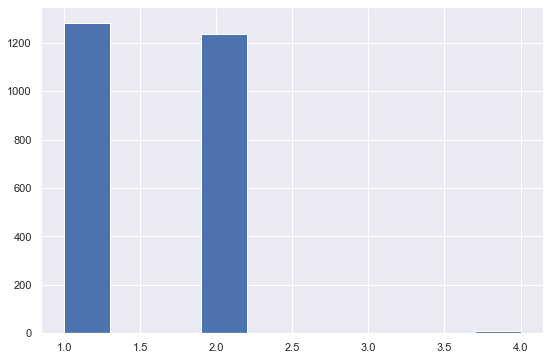

In [380]:
plt.hist(df_3[['session_number', 'category_id']][:10000].drop_duplicates().groupby('session_number').count().reset_index() \
.rename(columns={'category_id': 'category_count'}).category_count, bins=10)

plt.grid(True)

plt.show()

# Вычисление числа категорий в сессиях, построение гистограммы

In [382]:
category_count_in_sessions = df_3[['session_number', 'category_id']].drop_duplicates() \
.groupby('session_number').count().reset_index() \
.rename(columns={'category_id': 'category_count'})

In [383]:
category_count_in_sessions.head()

,session_number,category_count
0,0,2
1,1,1
2,2,1
3,3,5
4,4,3


In [387]:
category_count_in_sessions.shape

(418033, 2)

In [386]:
category_count_in_sessions.category_count.describe()

count    418033.000000
mean          5.421106
std           3.829604
min           1.000000
25%           3.000000
50%           4.000000
75%           7.000000
max          37.000000
Name: category_count, dtype: float64

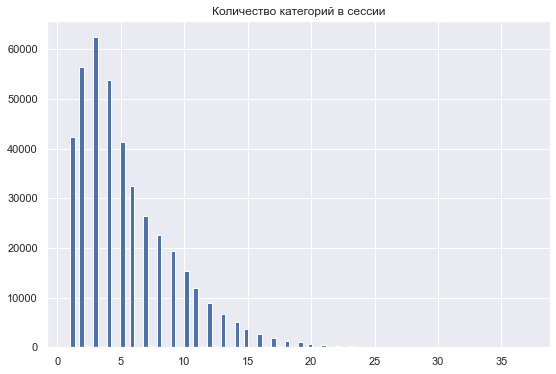

In [384]:
plt.hist(category_count_in_sessions.category_count, bins=100)

plt.title('Количество категорий в сессии')

plt.grid(True)

plt.show()

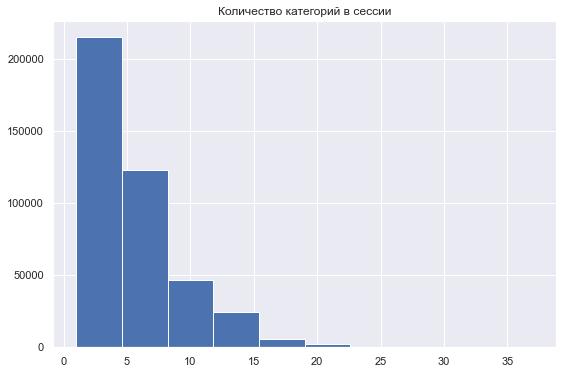

In [388]:
plt.hist(category_count_in_sessions.category_count, bins=10)

plt.title('Количество категорий в сессии')

plt.grid(True)

plt.show()

In [391]:
# посмотрим на крайний случай
category_count_in_sessions[category_count_in_sessions.category_count == 37]

,session_number,category_count
64853,161118,37
186325,705948,37
260480,1155866,37
413670,2375533,37
